In [1]:
# from os import listdir
# from scipy import signal
# from itertools import combinations, product
# import json
# import math
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import truncation
# import handle

# def timestat_acc(acc_t):
#     appended1, appended3 = [], []
#     Lx, Ly, Lz = [], [], []
    
#     for t in acc_t:
#         # appending number of zero crossing
#         L1 = t['x-axis (g)'].values.tolist()
#         ar_x = np.array(L1)
#         zcross_xa = ((ar_x[:-1] * ar_x[1:]) < 0).sum()
       
#         L2 = t['y-axis (g)'].values.tolist()
#         ar_y = np.array(L2)
#         zcross_ya = ((ar_y[:-1] * ar_y[1:]) < 0).sum()
        
#         L3 = t['z-axis (g)'].values.tolist()
#         ar_z = np.array(L3)
#         zcross_za = ((ar_z[:-1] * ar_z[1:]) < 0).sum()
        
#         Lx.append(ar_x)
#         Ly.append(ar_y)
#         Lz.append(ar_z)
#         appended1.append([zcross_xa, zcross_ya, zcross_za])
#         appended1.append([np.mean(L1), np.mean(L2), np.mean(L3)])
#         appended1.append([np.std(L1), np.std(L2), np.std(L3)])
        
#         # appending number of mean crossing
#         xcrossings_a, ycrossings_a, zcrossings_a = [], [], []
#         for i in range(1, len(ar_x)):
#             if ar_x[i-1] < np.mean(L1) and ar_x[i] >= np.mean(L1):
#                 xcrossings_a.append(i)
#             if ar_y[i-1] < np.mean(L2) and ar_y[i] >= np.mean(L2):
#                 ycrossings_a.append(i)
#             if ar_z[i-1] < np.mean(L3) and ar_z[i] >= np.mean(L3):
#                 zcrossings_a.append(i)
                
#         appended1.append([len(xcrossings_a), len(ycrossings_a), len(zcrossings_a)])
    
#     # calculating covariance
#     for i in range(len(Lx)):
#         # setting conditions to deducting corresponding mean values from the array of different tries
#         Lxi = Lx[i] - appended1[4*i+1][0]
#         Lyi = Ly[i] - appended1[4*i+1][1]
#         Lzi = Lz[i] - appended1[4*i+1][2]

#         # using combination to calculate SOP of values divided by the number of values
#         for i in combinations([Lxi,Lyi,Lzi],2):
#             for x,y in [i]:
#                 appended3.append(sum(x*y)/(len(Lxi)-1))
    
#     return appended1,appended3
    
# def timestat_gyr(gyro_t):
#     appended2, appended4 = [], []
#     L_x, L_y, L_z = [], [], []
    
#     for t in gyro_t:
#         L4 = t['x-axis (deg/s)'].values.tolist()
#         ar_x = np.array(L4)
#         zcross_xg = ((ar_x[:-1] * ar_x[1:]) < 0).sum()
        
#         L5 = t['y-axis (deg/s)'].values.tolist()
#         ar_y = np.array(L5)
#         zcross_yg = ((ar_y[:-1] * ar_y[1:]) < 0).sum()
        
#         L6 = t['z-axis (deg/s)'].values.tolist()
#         ar_z = np.array(L6)
#         zcross_zg = ((ar_z[:-1] * ar_z[1:]) < 0).sum()
        
#         L_x.append(ar_x)
#         L_y.append(ar_y)
#         L_z.append(ar_z)
#         appended2.append([zcross_xg, zcross_yg, zcross_zg])
#         appended2.append([np.mean(L4), np.mean(L5), np.mean(L6)])
#         appended2.append([np.std(L4), np.std(L5), np.std(L6)])
        
#         xcrossings_g, ycrossings_g, zcrossings_g = [], [], []
#         for i in range(1, len(ar_x)):
#             if ar_x[i-1] < np.mean(L4) and ar_x[i] >= np.mean(L4):
#                 xcrossings_g.append(i)
#             if ar_y[i-1] < np.mean(L5) and ar_y[i] >= np.mean(L5):
#                 ycrossings_g.append(i)
#             if ar_z[i-1] < np.mean(L6) and ar_z[i] >= np.mean(L6):
#                 zcrossings_g.append(i)
                
#         appended2.append([len(xcrossings_g), len(ycrossings_g), len(zcrossings_g)])
        
#     for i in range(len(L_x)):
#         Lxi = L_x[i] - appended2[4*i+1][0]
#         Lyi = L_y[i] - appended2[4*i+1][1]
#         Lzi = L_z[i] - appended2[4*i+1][2]

#         for i in combinations([Lxi,Lyi,Lzi],2):
#             for x,y in [i]:
#                 appended4.append(sum(x*y)/(len(Lxi)-1))

#     return appended2,appended4
    
# def cal_magnitude(df, file, window):
#     # combine triaxial data into one singular magnitude data
#     if 'Accelerometer' in file:
#         df['x'] = df.loc[window-1:,'x-axis (g)']-df['x-axis (g)'].rolling(window).mean()[window-1:]
#         df['y'] = df.loc[window-1:,'y-axis (g)']-df['y-axis (g)'].rolling(window).mean()[window-1:]
#         df['z'] = df.loc[window-1:,'z-axis (g)']-df['z-axis (g)'].rolling(window).mean()[window-1:]
#         df['magnitude'] = df['x']**2 + df['y']**2 + df['z']**2
#         df['magnitude'] = (df['magnitude'].apply(math.sqrt))*9.81
        
#     elif 'Gyroscope' in file:
#         df['x'] = df.loc[window-1:,'x-axis (deg/s)']-df['x-axis (deg/s)'].rolling(window).mean()[window-1:]
#         df['y'] = df.loc[window-1:,'y-axis (deg/s)']-df['x-axis (deg/s)'].rolling(window).mean()[window-1:]
#         df['z'] = df.loc[window-1:,'z-axis (deg/s)']-df['x-axis (deg/s)'].rolling(window).mean()[window-1:]
#         df['magnitude'] = df['x']**2 + df['y']**2 + df['z']**2
#         df['magnitude'] = df['magnitude'].apply(math.sqrt)
        
#     return df

# # MAIN FUNCTION
# def main(filepath='/', window=3, truncate=None, columns=None):
#     info = []
#     path = 'Motion Data/' + filepath + '.csv'
#     file_name = path.split('/')[1]
#     title_main = file_name.split('_')[0]

#     # append user's requested metrics to the default metrics
#     columns = ['test','sensor','datatype','lvl','try','duration'] + columns

#     # extract dataframe
#     df_main = pd.read_csv(path)

#     # find moving average of triaxial data and combine them into one singular magnitude data
#     df_main = cal_magnitude(df_main, file_name, window)

#     acc, gyr = [], []
#     for test in range(3):
#         # include tries in title
#         title = (title_main.split('-')[0] + '-' + title_main.split('-')[1] + 
#                  '-try' + str(test+1) + '-' + title_main.split('-')[2] + 
#                  '-' + file_name.split('_')[4])

#         # truncate signal beyond start and end times
#         if (truncate is not None) and (truncate[filepath][test] != ()):
#             df = df_main.loc[(df_main['elapsed (s)'] <= truncate[filepath][test][1]) & 
#                              (df_main['elapsed (s)'] >= truncate[filepath][test][0])]
#             df.reset_index(inplace=True)
#         else:
#             df = df_main

#         # find peaks and troughs in signal
#         time_p, p_plot, peaks, col = handle.find_peaks(title, df, 10)
#         time_t, t_plot, troughs, col = handle.find_troughs(title, df, 10)
#         result_main = pd.concat([peaks, troughs], axis=0, join='outer', ignore_index=False)
#         result_main = result_main.sort_values(by=['time'])
#         result = result_main.reset_index(drop=True)

#         # find jitter peaks and troughs in signal
#         time_p_j, p_plot_j, peaks, col = handle.find_peaks(title, df, None)
#         time_t_j, t_plot_j, troughs, col = handle.find_troughs(title, df, None)
#         result_main = pd.concat([peaks, troughs], axis=0, join='outer', ignore_index=False)
#         result_main = result_main.sort_values(by=['time'])
#         result_main = result_main.reset_index(drop=True)
#         result_jitters = handle.get_jitters(result_main)
        
#         time_p_j = list(result_jitters[result_jitters['peaks'] > 0]['time'])
#         p_plot_j = list(result_jitters[result_jitters['peaks'] > 0]['peaks'])
#         time_t_j = list(result_jitters[result_jitters['peaks'] < 0]['time'])
#         t_plot_j = list(result_jitters[result_jitters['peaks'] < 0]['peaks'])

#         # plot altered peak and troughs with original signal
#         start, end = 0, 300
#         ax1=df.plot(x='elapsed (s)', y=[col], figsize=(16,7), title=title)
#         result.plot.scatter(x='time', y='peaks', ax=ax1, s=140, c='r')
#         result_jitters.plot.scatter(x='time', y='peaks', ax=ax1, s=70, c='b')
#         ax1.grid(True)
#         ax1.set_xlabel('time (s)')
#         ax1.set_ylabel('amplitude')
#         plt.show()

#         magunit = 'm/s^2' if 'Accelerometer' in file_name else 'degrees/s'

#         obj = pd.DataFrame({
#             'metric_name': ['test', 'sensor', 'datatype', 'lvl', 'try', 'axis', 'duration',
#                           '+ve actions', '+ve peak height', '+ve peak height std', '+ve peak width', '+ve peak width std',
#                           '+ve actions_j', '+ve peak height_j', '+ve peak height_j std', '+ve peak width_j', '+ve peak width_j std',
#                           '-ve actions', '-ve peak height', '-ve peak height std', '-ve peak width', '-ve peak width std',
#                           '-ve actions_j', '-ve peak height_j', '-ve peak height_j std', '-ve peak width_j', '-ve peak width_j std'],
#             'metric_description': ['test', 'sensor location', 'datatype', 'level of severity', 'try', 'significant axis', 'duration',
#                             'number of main peaks at +ve axis', 'average height of main peaks at +ve axis', 'standard deviation of height of main peaks at +ve axis', 'average width of main peaks at +ve axis', 'standard deviation of width of main peaks at +ve axis',
#                             'number of jitter peaks at +ve axis', 'average height of jitter peaks at +ve axis', 'standard deviation of height of jitter peaks at +ve axis', 'average width of jitter peaks at +ve axis', 'standard deviation of width of jitter peaks at +ve axis',
#                             'number of main peaks at -ve axis', 'average height of main peaks at -ve axis', 'standard deviation of height of main peaks at -ve axis', 'average width of main peaks at -ve axis', 'standard deviation of width of main peaks at -ve axis',
#                             'number of jitter peaks at -ve axis', 'average height of jitter peaks at -ve axis', 'standard deviation of height of jitter peaks at -ve axis', 'average width of jitter peaks at -ve axis', 'standard deviation of width of jitter peaks at -ve axis'],
#             'author': ['JW', 'JW', 'JW', 'JW', 'JW', 'JW', 'JW',
#                         'JW', 'JW', 'JW', 'JW', 'JW',
#                         'JW', 'JW', 'JW', 'JW', 'JW',
#                         'JW', 'JW', 'JW', 'JW', 'JW',
#                         'JW', 'JW', 'JW', 'JW', 'JW'],
#             'value': [title_main.split('-')[0], title_main.split('-')[2], file_name.split('_')[4], int(title_main.split('-')[1][-1]), test+1, col, df.loc[len(df)-1,'elapsed (s)']-df.loc[0,'elapsed (s)'],
#                        len(time_p), np.mean(p_plot), np.std(p_plot), np.mean(np.diff(time_p)), np.std(np.diff(time_p)),
#                        len(time_p_j), np.mean(p_plot_j), np.std(p_plot_j), np.mean(np.diff(time_p_j)), np.std(np.diff(time_p_j)),
#                        len(time_t), np.mean(t_plot), np.std(t_plot), np.mean(np.diff(time_t)), np.std(np.diff(time_t)),
#                        len(time_t_j), np.mean(t_plot_j), np.std(t_plot_j), np.mean(np.diff(time_t_j)), np.std(np.diff(time_t_j))],
#             'units': ['-', '-', '-', '-', '-', '-', 's',
#                       '-', magunit, '-', 's', '-',
#                       '-', magunit, '-', 's', '-',
#                       '-', magunit, '-', 's', '-',
#                       '-', magunit, '-', 's', '-'],
#         })

#         info.append(obj[obj['metric_name'].isin(columns)])

#         # for zero crossing rate, mean crossing rate and covariance
#         if 'Accelerometer' in file_name: acc.append(df)
#         else:                            gyr.append(df)

#     # for zero crossing rate, mean crossing rate and covariance
#     if 'Accelerometer' in file_name: appended,cov = timestat_acc(acc)
#     else:                            appended,cov = timestat_gyr(gyr)

#     # append zero crossing rate, mean crossing rate and covariance data
#     for i in range(3):
#         obj2 = pd.DataFrame({
#             'metric_name': ['zcr-x', 'zcr-y', 'zcr-z',
#                           'mcr-x', 'mcr-y', 'mcr-z',
#                           'xy', 'xz', 'yz'],
#             'metric_description': ['zero crossing rate - x', 'zero crossing rate - y', 'zero crossing rate - z',
#                             'mean crossing rate - x', 'mean crossing rate - y', 'mean crossing rate - z',
#                             'xy covariance', 'xz covariance', 'yz covariance'],
#             'author': ['CY', 'CY', 'CY',
#                         'CY', 'CY', 'CY',
#                         'CY', 'CY', 'CY'],
#             'value': [appended[i*4][0], appended[i*4][1], appended[i*4][2],
#                        appended[i*4+3][0], appended[i*4+3][1], appended[i*4+3][2],
#                        cov[i*3+0], cov[i*3+1], cov[i*3+2]],
#             'units': ['-', '-', '-',
#                       '-', '-', '-',
#                       '-', '-', '-'],
#         })
        
#         # append stats into dataframe if it is requested
#         info[i] = info[i].append(obj2[obj2['metric_name'].isin(columns)])
        
#         # convert dataframe into json format
#         info[i] = eval(info[i].to_json(orient='records'))

#     return info

# cols = ['+ve actions_j', '+ve peak height_j', '+ve peak height_j std', '+ve peak width_j', '+ve peak width_j std','xy']

# info = main(filepath=input('Please Insert File Name (without .csv): '), truncate=truncation.values, columns=cols)
# # print(json.dumps(info, indent=4))

In [2]:
# info

# info_new = []

# for ix, i in enumerate(info):
#     for j in i:
#         j["metric_name"] = "_".join([j["metric_name"], str(ix)])
    
#     info_new.extend(i)

In [3]:
# info_new

In [4]:
from datetime import datetime
import time

start = datetime.now()

In [5]:
__start = None

def clock(reset=False, msg='', show=True):
    global __start
    
    if reset: 
        __start = None
    
    if __start is None:        
        result = 0
    else:
        result = datetime.now() - __start
        
    __start = datetime.now() 
        
    if show and not reset:
        print(msg, result)
        
    return result

In [30]:
from os import listdir
from scipy import signal
from itertools import combinations, product
import json
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import truncation
import handle

In [31]:
from tqdm.notebook import tqdm_notebook as tqdm

tqdm.pandas()

D:\Users\liong\miniconda3\envs\vks\lib\site-packages\tqdm\std.py:666: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [32]:
def cal_magnitude(df, file, window):
    # combine triaxial data into one singular magnitude data
    if 'Accelerometer' in file:
        df['x'] = df.loc[window-1:,'x-axis (g)']-df['x-axis (g)'].rolling(window).mean()[window-1:]
        df['y'] = df.loc[window-1:,'y-axis (g)']-df['y-axis (g)'].rolling(window).mean()[window-1:]
        df['z'] = df.loc[window-1:,'z-axis (g)']-df['z-axis (g)'].rolling(window).mean()[window-1:]
        df['magnitude'] = df['x']**2 + df['y']**2 + df['z']**2
        df['magnitude'] = (df['magnitude'].apply(math.sqrt))*9.81
        
    elif 'Gyroscope' in file:
        df['x'] = df.loc[window-1:,'x-axis (deg/s)']-df['x-axis (deg/s)'].rolling(window).mean()[window-1:]
        df['y'] = df.loc[window-1:,'y-axis (deg/s)']-df['x-axis (deg/s)'].rolling(window).mean()[window-1:]
        df['z'] = df.loc[window-1:,'z-axis (deg/s)']-df['x-axis (deg/s)'].rolling(window).mean()[window-1:]
        df['magnitude'] = df['x']**2 + df['y']**2 + df['z']**2
        df['magnitude'] = df['magnitude'].apply(math.sqrt)
        
    return df

In [33]:
def timestat_acc(acc_t):
    appended1, appended3 = [], []
    Lx, Ly, Lz = [], [], []
    
    for t in acc_t:
        # appending number of zero crossing
        L1 = t['x-axis (g)'].values.tolist()
        ar_x = np.array(L1)
        zcross_xa = ((ar_x[:-1] * ar_x[1:]) < 0).sum()
       
        L2 = t['y-axis (g)'].values.tolist()
        ar_y = np.array(L2)
        zcross_ya = ((ar_y[:-1] * ar_y[1:]) < 0).sum()
        
        L3 = t['z-axis (g)'].values.tolist()
        ar_z = np.array(L3)
        zcross_za = ((ar_z[:-1] * ar_z[1:]) < 0).sum()
        
        Lx.append(ar_x)
        Ly.append(ar_y)
        Lz.append(ar_z)
        appended1.append([zcross_xa, zcross_ya, zcross_za])
        appended1.append([np.mean(L1), np.mean(L2), np.mean(L3)])
        appended1.append([np.std(L1), np.std(L2), np.std(L3)])
        
        # appending number of mean crossing
        xcrossings_a, ycrossings_a, zcrossings_a = [], [], []
        for i in range(1, len(ar_x)):
            if ar_x[i-1] < np.mean(L1) and ar_x[i] >= np.mean(L1):
                xcrossings_a.append(i)
            if ar_y[i-1] < np.mean(L2) and ar_y[i] >= np.mean(L2):
                ycrossings_a.append(i)
            if ar_z[i-1] < np.mean(L3) and ar_z[i] >= np.mean(L3):
                zcrossings_a.append(i)
                
        appended1.append([len(xcrossings_a), len(ycrossings_a), len(zcrossings_a)])
    
    # calculating covariance
    for i in range(len(Lx)):
        # setting conditions to deducting corresponding mean values from the array of different tries
        Lxi = Lx[i] - appended1[4*i+1][0]
        Lyi = Ly[i] - appended1[4*i+1][1]
        Lzi = Lz[i] - appended1[4*i+1][2]

        # using combination to calculate SOP of values divided by the number of values
        for i in combinations([Lxi,Lyi,Lzi],2):
            for x,y in [i]:
                appended3.append(sum(x*y)/(len(Lxi)-1))
    
    return appended1,appended3
    
def timestat_gyr(gyro_t):
    appended2, appended4 = [], []
    L_x, L_y, L_z = [], [], []
    
    for t in gyro_t:
        L4 = t['x-axis (deg/s)'].values.tolist()
        ar_x = np.array(L4)
        zcross_xg = ((ar_x[:-1] * ar_x[1:]) < 0).sum()
        
        L5 = t['y-axis (deg/s)'].values.tolist()
        ar_y = np.array(L5)
        zcross_yg = ((ar_y[:-1] * ar_y[1:]) < 0).sum()
        
        L6 = t['z-axis (deg/s)'].values.tolist()
        ar_z = np.array(L6)
        zcross_zg = ((ar_z[:-1] * ar_z[1:]) < 0).sum()
        
        L_x.append(ar_x)
        L_y.append(ar_y)
        L_z.append(ar_z)
        appended2.append([zcross_xg, zcross_yg, zcross_zg])
        appended2.append([np.mean(L4), np.mean(L5), np.mean(L6)])
        appended2.append([np.std(L4), np.std(L5), np.std(L6)])
        
        xcrossings_g, ycrossings_g, zcrossings_g = [], [], []
        for i in range(1, len(ar_x)):
            if ar_x[i-1] < np.mean(L4) and ar_x[i] >= np.mean(L4):
                xcrossings_g.append(i)
            if ar_y[i-1] < np.mean(L5) and ar_y[i] >= np.mean(L5):
                ycrossings_g.append(i)
            if ar_z[i-1] < np.mean(L6) and ar_z[i] >= np.mean(L6):
                zcrossings_g.append(i)
                
        appended2.append([len(xcrossings_g), len(ycrossings_g), len(zcrossings_g)])
        
    for i in range(len(L_x)):
        Lxi = L_x[i] - appended2[4*i+1][0]
        Lyi = L_y[i] - appended2[4*i+1][1]
        Lzi = L_z[i] - appended2[4*i+1][2]

        for i in combinations([Lxi,Lyi,Lzi],2):
            for x,y in [i]:
                appended4.append(sum(x*y)/(len(Lxi)-1))

    return appended2,appended4

 0:00:00.008014
 0:00:00.003605
 0:00:00.003019
 0:00:00.001028
 0:00:00.002961
 0:00:00.000997
 0:00:00.001995
 0:00:00.000996
 0:00:00.000998
 0:00:00.000998



 0:00:06.172357
 0:00:00.001995


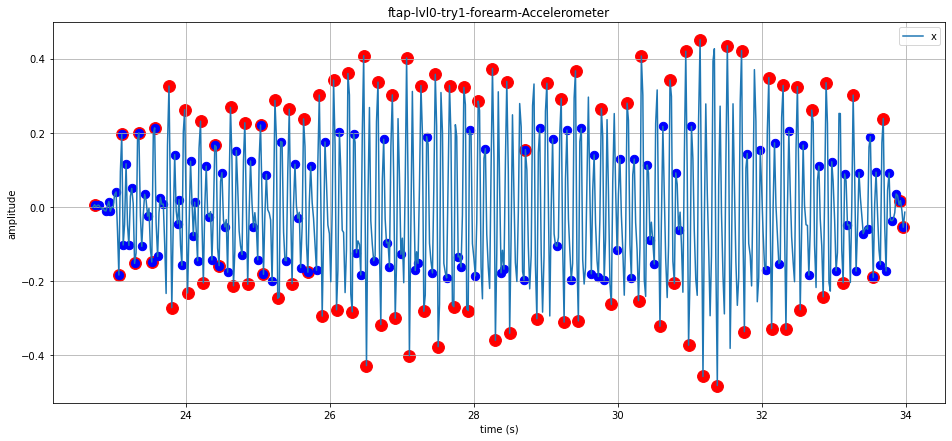

 0:00:00.247030
 0:00:00.000997
 0:00:00.001994
 0:00:00.003994
 0:00:00.003985
 0:00:00.003988
 0:00:00.000998
 0:00:00.001017
 0:00:00.000994



 0:00:06.118288
 0:00:00.002992


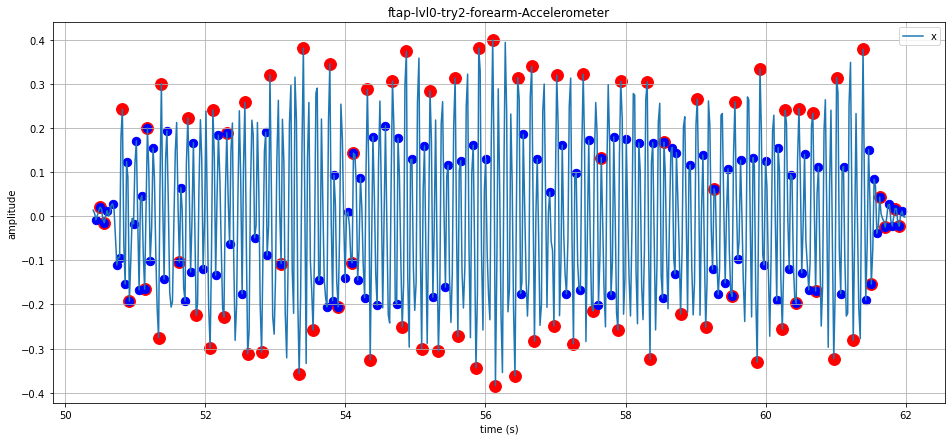

 0:00:00.247878
 0:00:00
 0:00:00.004005
 0:00:00.006967
 0:00:00.002989
 0:00:00.001994
 0:00:00.000667
 0:00:00
 0:00:00.000980



 0:00:05.467192
 0:00:00.002992


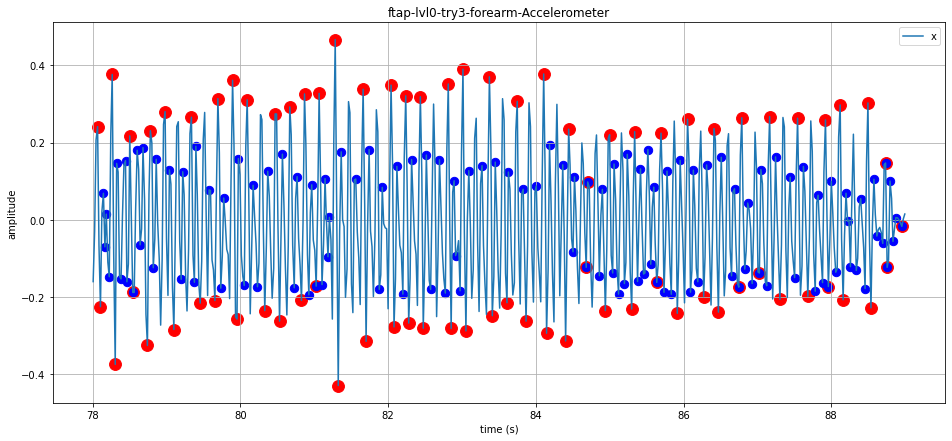

 0:00:00.263295
 0:00:00
 0:00:00.000997
 0:00:00.267972


In [34]:
time_test = []

# MAIN FUNCTION
def main(filepath='/', window=3, truncate=None, columns=None):
    info = []
    path = 'Motion Data/' + filepath + '.csv'
    file_name = path.split('/')[1]
    title_main = file_name.split('_')[0]

    # append user's requested metrics to the default metrics
    columns = ['test','sensor','datatype','lvl','try','duration'] + columns

    # extract dataframe
    df_main = pd.read_csv(path)

    # find moving average of triaxial data and combine them into one singular magnitude data
    clock(True)
    df_main = cal_magnitude(df_main, file_name, window)
    time_test.append(["Calc magnitude", clock()])

    acc, gyr = [], []
    
    truncated_df = []
    
    # extract truncation
    if truncate is not None: 
        try: 
            truncation_times = truncate[filepath]
            
            for test in truncate[filepath]:
                clock(True)
                df = df_main.loc[(df_main['elapsed (s)'] <= test[1]) & (df_main['elapsed (s)'] >= test[0])]
                df.reset_index(inplace=True)
                time_test.append(["Truncate", clock()])
                
                truncated_df.append(df)
        except KeyError:
            truncated_df = [df]
    else:
        truncated_df = [df]
        
    for test, df in enumerate(truncated_df):
        # include tries in title
        title = (title_main.split('-')[0] + '-' + title_main.split('-')[1] + 
                 '-try' + str(test+1) + '-' + title_main.split('-')[2] + 
                 '-' + file_name.split('_')[4])

        # find peaks and troughs in signal
        clock(True)
        time_p, p_plot, peaks, col = handle.find_peaks(title, df, 10)
        time_t, t_plot, troughs, col = handle.find_troughs(title, df, 10)
        result_main = pd.concat([peaks, troughs], axis=0, join='outer', ignore_index=False)
        result_main = result_main.sort_values(by=['time'])
        result = result_main.reset_index(drop=True)
        time_test.append(["Peaks and troughs", clock()])

        # find jitter peaks and troughs in signal
        time_p_j, p_plot_j, peaks, col = handle.find_peaks(title, df, None)
        time_test.append(["Jitter: find peaks", clock()])
        time_t_j, t_plot_j, troughs, col = handle.find_troughs(title, df, None)
        time_test.append(["Jitter: find troughs", clock()])
        result_main = pd.concat([peaks, troughs], axis=0, join='outer', ignore_index=False)
        time_test.append(["Jitter: pandas concatenation", clock()])
        result_main = result_main.sort_values(by=['time'])
        time_test.append(["Jitter: value sorting", clock()])
        result_main = result_main.reset_index(drop=True)
        time_test.append(["Jitter: index reset", clock()])
#         result_jitters = handle.get_jitters(result_main)
        
        def get_jitters(df):
            df['discard'] = 0

            for i, row in tqdm(df.iterrows()):
                pos_mean = np.mean(df[df['peaks'] > 0].peaks)
                neg_mean = np.mean(df[df['peaks'] < 0].peaks)

                for i, row in df.iterrows():
                    if df.loc[i, 'peaks'] > 0:
                        if df.loc[i, 'peaks'] > pos_mean:
                            df.at[i, 'discard'] = 1
                    elif df.loc[i, 'peaks'] < 0:
                        if df.loc[i, 'peaks'] < neg_mean:
                            df.at[i, 'discard'] = 1

            return df[df['discard'] == 0]

        result_jitters = get_jitters(result_main)
        time_test.append(["Jitter: get jitter", clock()])
        
        time_p_j = list(result_jitters[result_jitters['peaks'] > 0]['time'])
        p_plot_j = list(result_jitters[result_jitters['peaks'] > 0]['peaks'])
        time_t_j = list(result_jitters[result_jitters['peaks'] < 0]['time'])
        t_plot_j = list(result_jitters[result_jitters['peaks'] < 0]['peaks'])
        time_test.append(["Listing time_p_j and p_plot_j", clock()])

        # plot altered peak and troughs with original signal
        start, end = 0, 300
        ax1=df.plot(x='elapsed (s)', y=[col], figsize=(16,7), title=title)
        result.plot.scatter(x='time', y='peaks', ax=ax1, s=140, c='r')
        result_jitters.plot.scatter(x='time', y='peaks', ax=ax1, s=70, c='b')
        ax1.grid(True)
        ax1.set_xlabel('time (s)')
        ax1.set_ylabel('amplitude')
        plt.show()
        time_test.append(["Plotting", clock()])

        clock()
        magunit = 'm/s^2' if 'Accelerometer' in file_name else 'degrees/s'

        obj = pd.DataFrame({
            'metric_name': ['test', 'sensor', 'datatype', 'lvl', 'try', 'axis', 'duration',
                          '+ve actions', '+ve peak height', '+ve peak height std', '+ve peak width', '+ve peak width std',
                          '+ve actions_j', '+ve peak height_j', '+ve peak height_j std', '+ve peak width_j', '+ve peak width_j std',
                          '-ve actions', '-ve peak height', '-ve peak height std', '-ve peak width', '-ve peak width std',
                          '-ve actions_j', '-ve peak height_j', '-ve peak height_j std', '-ve peak width_j', '-ve peak width_j std'],
            'metric_description': ['test', 'sensor location', 'datatype', 'level of severity', 'try', 'significant axis', 'duration',
                            'number of main peaks at +ve axis', 'average height of main peaks at +ve axis', 'standard deviation of height of main peaks at +ve axis', 'average width of main peaks at +ve axis', 'standard deviation of width of main peaks at +ve axis',
                            'number of jitter peaks at +ve axis', 'average height of jitter peaks at +ve axis', 'standard deviation of height of jitter peaks at +ve axis', 'average width of jitter peaks at +ve axis', 'standard deviation of width of jitter peaks at +ve axis',
                            'number of main peaks at -ve axis', 'average height of main peaks at -ve axis', 'standard deviation of height of main peaks at -ve axis', 'average width of main peaks at -ve axis', 'standard deviation of width of main peaks at -ve axis',
                            'number of jitter peaks at -ve axis', 'average height of jitter peaks at -ve axis', 'standard deviation of height of jitter peaks at -ve axis', 'average width of jitter peaks at -ve axis', 'standard deviation of width of jitter peaks at -ve axis'],
            'author': ['JW', 'JW', 'JW', 'JW', 'JW', 'JW', 'JW',
                        'JW', 'JW', 'JW', 'JW', 'JW',
                        'JW', 'JW', 'JW', 'JW', 'JW',
                        'JW', 'JW', 'JW', 'JW', 'JW',
                        'JW', 'JW', 'JW', 'JW', 'JW'],
            'value': [title_main.split('-')[0], title_main.split('-')[2], file_name.split('_')[4], int(title_main.split('-')[1][-1]), test+1, col, df.loc[len(df)-1,'elapsed (s)']-df.loc[0,'elapsed (s)'],
                       len(time_p), np.mean(p_plot), np.std(p_plot), np.mean(np.diff(time_p)), np.std(np.diff(time_p)),
                       len(time_p_j), np.mean(p_plot_j), np.std(p_plot_j), np.mean(np.diff(time_p_j)), np.std(np.diff(time_p_j)),
                       len(time_t), np.mean(t_plot), np.std(t_plot), np.mean(np.diff(time_t)), np.std(np.diff(time_t)),
                       len(time_t_j), np.mean(t_plot_j), np.std(t_plot_j), np.mean(np.diff(time_t_j)), np.std(np.diff(time_t_j))],
            'units': ['-', '-', '-', '-', '-', '-', 's',
                      '-', magunit, '-', 's', '-',
                      '-', magunit, '-', 's', '-',
                      '-', magunit, '-', 's', '-',
                      '-', magunit, '-', 's', '-'],
        })

        info.append(obj[obj['metric_name'].isin(columns)])

        # for zero crossing rate, mean crossing rate and covariance
        if 'Accelerometer' in file_name: acc.append(df)
        else:                            gyr.append(df)
            
        time_test.append(["TEST_STOP_1", clock()])

    # for zero crossing rate, mean crossing rate and covariance
    if 'Accelerometer' in file_name: appended,cov = timestat_acc(acc)
    else:                            appended,cov = timestat_gyr(gyr)

    # append zero crossing rate, mean crossing rate and covariance data
    for i in range(3):
        obj2 = pd.DataFrame({
            'metric_name': ['zcr-x', 'zcr-y', 'zcr-z',
                          'mcr-x', 'mcr-y', 'mcr-z',
                          'xy', 'xz', 'yz'],
            'metric_description': ['zero crossing rate - x', 'zero crossing rate - y', 'zero crossing rate - z',
                            'mean crossing rate - x', 'mean crossing rate - y', 'mean crossing rate - z',
                            'xy covariance', 'xz covariance', 'yz covariance'],
            'author': ['CY', 'CY', 'CY',
                        'CY', 'CY', 'CY',
                        'CY', 'CY', 'CY'],
            'value': [appended[i*4][0], appended[i*4][1], appended[i*4][2],
                       appended[i*4+3][0], appended[i*4+3][1], appended[i*4+3][2],
                       cov[i*3+0], cov[i*3+1], cov[i*3+2]],
            'units': ['-', '-', '-',
                      '-', '-', '-',
                      '-', '-', '-'],
        })
        
        # append stats into dataframe if it is requested
        info[i] = info[i].append(obj2[obj2['metric_name'].isin(columns)])
        
        # convert dataframe into json format
        info[i] = eval(info[i].to_json(orient='records'))

    time_test.append(["TEST_STOP_2", clock()])
        
    return info

cols = ['+ve actions_j', '+ve peak height_j', '+ve peak height_j std', '+ve peak width_j', '+ve peak width_j std','xy']

# info = main(filepath=input('Please Insert File Name (without .csv): '), truncate=truncation.values, columns=cols)

info = main(filepath='ftap-lvl0-forearm_S2_2019-12-05T09.55.32.037_C49948A1895C_Accelerometer_1.4.5', truncate=truncation.values, columns=cols)

# print(json.dumps(info, indent=4))

In [35]:
test = []

for t in range(len(time_test)):
    test.append([time_test[t][0], (time_test[t][1] * 1000).seconds/1000]) 

pd.DataFrame(test)

,0,1
0,Calc magnitude,0.008
1,Truncate,0.003
2,Truncate,0.003
3,Truncate,0.001
4,Peaks and troughs,0.002
5,Jitter: find peaks,0.000
6,Jitter: find troughs,0.001
7,Jitter: pandas concatenation,0.000
8,Jitter: value sorting,0.000
9,Jitter: index reset,0.000


In [10]:
print(datetime.now() - start)

0:00:18.533998
